In [2]:
import numpy as np
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Dataset #

In [42]:
# Number of points for each class
num_points = 400

# Generate class 0 points near top-left and bottom-right corners
X1 = np.concatenate([np.random.normal(loc=[0, 1], scale=0.2, size=(num_points//2, 2)),
                           np.random.normal(loc=[1, 0], scale=0.2, size=(num_points//2, 2))])

# Generate class 1 points near top-right and bottom-left corners
X2 = np.concatenate([np.random.normal(loc=[1, 1], scale=0.2, size=(num_points//2, 2)),
                           np.random.normal(loc=[0, 0], scale=0.2, size=(num_points//2, 2))])

# Combine the two classes
X = np.concatenate([X1, X2])
y = np.concatenate([np.zeros(num_points), np.ones(num_points)]).astype(int)

# Shuffle the data
shuffle_indices = np.random.permutation(len(X))
X = X[shuffle_indices]
y = y[shuffle_indices]

# Split data into train and test sets
X_train, X_test = X[:int(0.5*len(X))], X[int(0.5*len(X)):]
y_train, y_test = y[:int(0.5*len(y))], y[int(0.5*len(y)):]

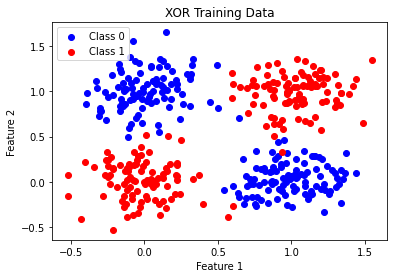

In [6]:
# Plotting training data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', label='Class 1')
plt.title('XOR Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

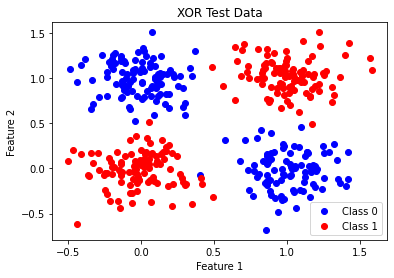

In [7]:
# Plotting test data
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='blue', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='red', label='Class 1')
plt.title('XOR Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [21]:
# Define function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [22]:
# Get the weights and biases of each layer
def wb(model):
    for i, layer in enumerate(model.layers):
        print(f"Layer {i + 1}:")
        weights, biases = layer.get_weights()
        print(f"Weights shape: {weights.shape}")
        print(f"Biases shape: {biases.shape}")
        print("")

        # If you want to access weights and biases of individual neurons in a layer
        if isinstance(layer, tf.keras.layers.Dense):
            for j in range(weights.shape[1]):  # Iterate over neurons in the layer
                print(f"Neuron {j + 1}:")
                print(f"Weights: {weights[:, j]}")
                print(f"Bias: {biases[j]}")
                print("")

## 1. MLP ## 

Train

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9919 - loss: 0.0841 

Test

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.0915 
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


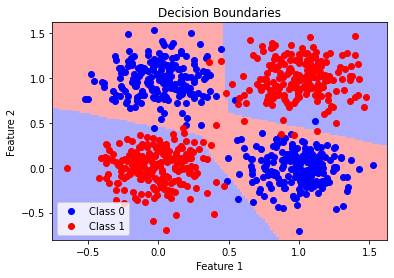

In [26]:
model0 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model0.fit(X_train, y_train, epochs=300, batch_size=30, verbose=0)

print("Train\n")
train_loss, train_accuracy = model0.evaluate(X_train, y_train)
print("\nTest\n")
test_loss, test_accuracy = model0.evaluate(X_test, y_test)

plot_decision_boundary(X, y, model0, 'Decision Boundaries')

![Image 1](1.png)

In [180]:
wb(model0)

Layer 1:
Weights shape: (2, 5)
Biases shape: (5,)

Neuron 1:
Weights: [-1.7444522 -1.6347044]
Bias: 1.3396036624908447

Neuron 2:
Weights: [-1.4750217  0.7579932]
Bias: 0.22324635088443756

Neuron 3:
Weights: [ 1.3830756 -2.8650737]
Bias: 0.7435842156410217

Neuron 4:
Weights: [-2.1053486  1.1090436]
Bias: 0.29087743163108826

Neuron 5:
Weights: [-1.6842057 -1.5500457]
Bias: 1.274745225906372

Layer 2:
Weights shape: (5, 1)
Biases shape: (1,)

Neuron 1:
Weights: [ 2.4060218 -2.7610557 -3.1926627 -3.421217   2.9833584]
Bias: 1.984371542930603



In [38]:
X_train_sub, X_val = X_train[:int(0.5*len(X_train))], X_train[int(0.5*len(X_train)):]
y_train_sub, y_val = y_train[:int(0.5*len(y_train))], y_train[int(0.5*len(y_train)):]

## 2. MLP with L1 regularization ##

Validation Accuracy for penalty 0.001: 0.9449999928474426
Validation Accuracy for penalty 0.003: 0.7549999952316284
Validation Accuracy for penalty 0.01: 0.9150000214576721
Validation Accuracy for penalty 0.03: 0.925000011920929
Validation Accuracy for penalty 0.1: 0.5249999761581421
Validation Accuracy for penalty 0.3: 0.5249999761581421
Best penalty: 0.001
Train

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9919 - loss: 0.0841 

Test

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9774 - loss: 0.0915 
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


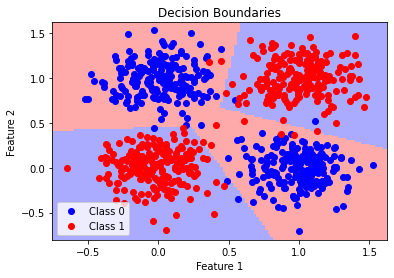

In [29]:
def model1(alpha):
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(5, input_dim=2, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(alpha)),
            tf.keras.layers.Dense(1, activation='sigmoid')
            ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

penalty_values = [0.001,0.003,0.01,0.03,0.1,0.3]

best_accuracy = 0
best_penalty = None

for penalty in penalty_values:
    model = model1(penalty)
    model.fit(X_train_sub, y_train_sub, epochs=300, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f'Validation Accuracy for penalty {penalty}: {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_penalty = penalty

print(f'Best penalty: {best_penalty}')

final_model = model1(best_penalty)
final_model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0)

print("Train\n")
train_loss, train_accuracy = model0.evaluate(X_train, y_train)
print("\nTest\n")
test_loss, test_accuracy = model0.evaluate(X_test, y_test)

plot_decision_boundary(X, y, final_model, 'Decision Boundaries')


![Image 2](2.png)

In [31]:
wb(final_model)

Layer 1:
Weights shape: (2, 5)
Biases shape: (5,)

Neuron 1:
Weights: [0.8629884 2.1941545]
Bias: -1.3076990842819214

Neuron 2:
Weights: [-1.4707696  1.3775313]
Bias: -0.28031083941459656

Neuron 3:
Weights: [-1.1402833  1.1572118]
Bias: -0.2718367576599121

Neuron 4:
Weights: [-2.6200795 -1.2290727]
Bias: 1.6978610754013062

Neuron 5:
Weights: [-1.837912   1.7675172]
Bias: -0.3885990083217621

Layer 2:
Weights shape: (5, 1)
Biases shape: (1,)

Neuron 1:
Weights: [ 3.294826  -2.5992534 -2.022821   3.3737142 -1.8184948]
Bias: -1.7869900465011597



## 3. MLP with L2 regularization ##

Validation Accuracy for penalty 0.001: 0.9649999737739563
Validation Accuracy for penalty 0.003: 0.9599999785423279
Validation Accuracy for penalty 0.01: 0.9649999737739563
Validation Accuracy for penalty 0.03: 0.675000011920929
Validation Accuracy for penalty 0.1: 0.9449999928474426
Validation Accuracy for penalty 0.3: 0.7149999737739563
Best penalty: 0.001
Train

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: 0.1140 

Test

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9850 - loss: 0.0954 
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


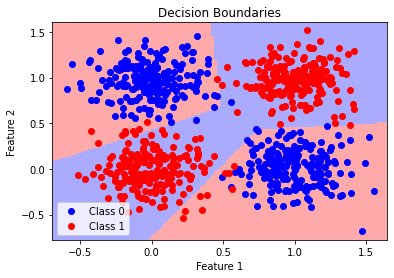

In [44]:
def model2(alpha):
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(5, input_dim=2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(alpha)),
            tf.keras.layers.Dense(1, activation='sigmoid')
            ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
penalty_values = [0.001,0.003,0.01,0.03,0.1,0.3]

best_accuracy = 0
best_penalty = None

for penalty in penalty_values:
    model = model2(penalty)
    model.fit(X_train_sub, y_train_sub, epochs=300, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f'Validation Accuracy for penalty {penalty}: {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_penalty = penalty

print(f'Best penalty: {best_penalty}')

final_model2 = model2(best_penalty)
final_model2.fit(X_train, y_train, epochs=300, batch_size=32, verbose=0)

print("Train\n")
train_loss, train_accuracy = model0.evaluate(X_train, y_train)
print("\nTest\n")
test_loss, test_accuracy = model0.evaluate(X_test, y_test)

plot_decision_boundary(X, y, final_model2, 'Decision Boundaries')

![Image 3](3.png)

In [191]:
wb(final_model2)

Layer 1:
Weights shape: (2, 5)
Biases shape: (5,)

Neuron 1:
Weights: [1.1828692 1.5646622]
Bias: -1.3349854946136475

Neuron 2:
Weights: [ 1.1842899  -0.28919196]
Bias: 0.7033743858337402

Neuron 3:
Weights: [-2.0546138 -1.4381502]
Bias: 1.6742711067199707

Neuron 4:
Weights: [-2.8379016  2.3969672]
Bias: -0.15614524483680725

Neuron 5:
Weights: [1.1767279 1.5437893]
Bias: -1.3252612352371216

Layer 2:
Weights shape: (5, 1)
Biases shape: (1,)

Neuron 1:
Weights: [ 2.4163148 -1.5280899  3.7409942 -2.3824084  2.6890054]
Bias: -0.5021719932556152



## 4. Logistic Regression ##

In [15]:
def GradientDescent(X,y,lr=0.001,epoch=1000):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])

    for i in range(epoch):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
    return weights[1:],weights[0]

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def predict(X, coef, intercept, threshold=0.5):
    z = np.dot(X, coef.T) + intercept
    probabilities = sigmoid(z)
    predictions = (probabilities > threshold).astype(int)
    return predictions

In [6]:
def plot_LR_bound(X,y,coef,intercept):
    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),np.linspace(x2_min, x2_max, 100))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    grid_extended = np.hstack([grid, np.prod(grid, axis=1).reshape(-1, 1)])
    decision_boundary = predict(grid_extended,coef,intercept,0.5).reshape(xx1.shape)

    plt.figure(figsize=(5, 3))
    plt.contourf(xx1, xx2, decision_boundary, cmap=plt.cm.RdBu, alpha=0.8)
    # Convert class labels to colors
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

### 4.1    [ $x_1, x_2, x_1^2$ ] ###

In [376]:
# Generate additional feature x1^2 for both train and test sets
X_train_additional_feature1 = X_train[:, 0] * X_train[:, 0]
X_test_additional_feature1 = X_test[:, 0] * X_test[:, 0]

# Reshape additional features to match the shape for concatenation
X_train_additional_feature1 = X_train_additional_feature1.reshape(-1, 1)
X_test_additional_feature1 = X_test_additional_feature1.reshape(-1, 1)

# Concatenate additional feature with the original features
X_train_extended1 = np.concatenate([X_train, X_train_additional_feature1], axis=1)
X_test_extended1 = np.concatenate([X_test, X_test_additional_feature1], axis=1)

In [396]:
coef1,intercept1 = GradientDescent(X_train_extended1,y_train,0.01,1000)

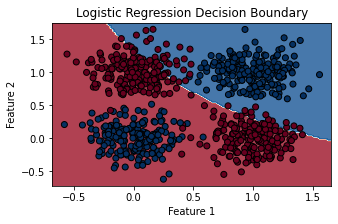

In [397]:
plot_LR_bound(X,y,coef1,intercept1)

![Image 4](4.png)

### 4.2    [ $x_1, x_2, x_2^2$ ] ###

In [16]:
# Generate additional feature x2^2 for both train and test sets
X_train_additional_feature2 = X_train[:, 1] * X_train[:, 1]
X_test_additional_feature2 = X_test[:, 1] * X_test[:, 1]

# Reshape additional features to match the shape for concatenation
X_train_additional_feature2 = X_train_additional_feature2.reshape(-1, 1)
X_test_additional_feature2 = X_test_additional_feature2.reshape(-1, 1)

# Concatenate additional feature with the original features
X_train_extended2 = np.concatenate([X_train, X_train_additional_feature2], axis=1)
X_test_extended2 = np.concatenate([X_test, X_test_additional_feature2], axis=1)

In [17]:
coef2,intercept2 = GradientDescent(X_train_extended2,y_train,0.5,5000)

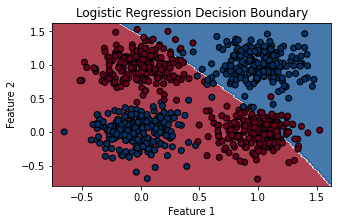

In [18]:
plot_LR_bound(X,y,coef2,intercept2)

![Image 5](5.png)

### 4.3    [ $x_1, x_2, x_1x_2$ ] ###

In [406]:
# Generate additional feature x1*x2 for both train and test sets
X_train_additional_feature3 = X_train[:, 0] * X_train[:, 1]
X_test_additional_feature3 = X_test[:, 0] * X_test[:, 1]

# Reshape additional features to match the shape for concatenation
X_train_additional_feature3 = X_train_additional_feature3.reshape(-1, 1)
X_test_additional_feature3 = X_test_additional_feature3.reshape(-1, 1)

# Concatenate additional feature with the original features
X_train_extended3 = np.concatenate([X_train, X_train_additional_feature3], axis=1)
X_test_extended3 = np.concatenate([X_test, X_test_additional_feature3], axis=1)

In [414]:
coef3,intercept3 = GradientDescent(X_train_extended3,y_train,0.1,5000)

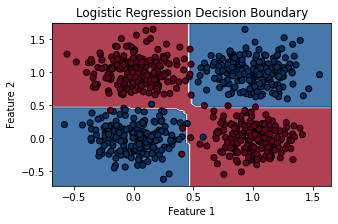

In [415]:
plot_LR_bound(X,y,coef3,intercept3)

![Image 6](6.png)